In [1]:
import numpy as np

def EditDistanceM(s, t):  
    size_x = len(s) + 1
    size_y = len(t) + 1
    matrix = np.zeros((size_x, size_y))
    
    for x in range(size_x):
        matrix[x, 0] = x
    for y in range(size_y):
        matrix[0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if s[x-1] == t[y-1]:
                matrix[x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix[x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

In [2]:
def calculateSimilarityScorePercentage(stringLength1, stringLength2, distance):
    maxLength = max(stringLength1, stringLength2)
    return ((maxLength - distance) / maxLength) * 100

In [3]:
def SimilarityScoresBetweenFiles(filePath1, filePath2):
    # open files
    file1 = open(filePath1, "r")
    file2 = open(filePath2, "r")
    file1_contents = file1.read().splitlines()
    file2_contents = file2.read().splitlines()
    file1.close()
    file2.close()
    
    # initialize list holding the tuples of lines and distances
    similarityScores = []
    file1_line_counter = 1
    for file1_line in file1_contents: 
        file2_line_counter = 1
        for file2_line in file2_contents:
            distance = EditDistanceM(file1_line, file2_line)
            similarityScore = calculateSimilarityScorePercentage(len(file1_line), len(file2_line), distance)
            similarityScores.append((file1_line_counter, file2_line_counter, similarityScore))
            file2_line_counter += 1
        file1_line_counter += 1
    return similarityScores

In [4]:
def printFirstNSimilarityScores(list, n):
    for i in range(n):
        print(str(list[i][0]) +", " + str(list[i][1]) + ", " + str(round(list[i][2],1)) + "%")

In [5]:
# set file path names
filePath1 = "dnalist1.txt"
filePath2 = "dnalist2.txt"

similarityScores = SimilarityScoresBetweenFiles(filePath1, filePath2)
similarityScores.sort(key=lambda x: x[2], reverse = True)
printFirstNSimilarityScores(similarityScores, 10)

55, 76, 62.0%
29, 5, 60.0%
92, 53, 60.0%
11, 83, 58.0%
13, 6, 58.0%
85, 83, 58.0%
5, 100, 56.0%
11, 66, 56.0%
16, 27, 56.0%
20, 48, 56.0%


In [6]:
import random

def generateFile(fileName, lineNum, lineLength):
    chars = ['A', 'T', 'G', 'C']
    generator = open(fileName, "w")
    for line in range(lineNum):
        randomLine = ""
        for c in range(lineLength):
            randomLetter = random.choice(chars)
            randomLine += randomLetter
        randomLine += "\n"
        generator.write(randomLine)
    generator.close()

In [7]:
def EditDistanceR(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:  # check all letters except last one
        cost = 0
    else:
        cost = 1
    res = min([EditDistanceR(s, t[:-1])+1, # Insert operation at the end
               EditDistanceR(s[:-1], t)+1, # Delete operation at the end
               EditDistanceR(s[:-1], t[:-1]) + cost]) # Replace operation at the end
    return res

In [8]:
import time

def editDistanceBetweenFiles(filePath1, filePath2, algorithm, executeTimesR, executeTimesM):
    # open files
    file1 = open(filePath1, "r")
    file2 = open(filePath2, "r")
    file1_contents = file1.read().splitlines()
    file2_contents = file2.read().splitlines()
    file1.close()
    file2.close()
    
    file1_line_counter = 1
    for file1_line in file1_contents: 
        file2_line_counter = 1
        for file2_line in file2_contents:
            if algorithm == 0:
                start = time.time()
                distance = EditDistanceR(file1_line, file2_line)
                end = time.time()
                executeTimesR.append(end-start)
            else:
                start = time.time()
                distance = EditDistanceM(file1_line, file2_line)
                end = time.time()
                executeTimesM.append(end-start)
            file2_line_counter += 1
        file1_line_counter += 1

In [9]:
#initialize lists for storing execution times for each algorithm
executeTimesR = []
executeTimesM = []

# i: line length
for i in range(1,21):
    # create files
    generateFile("file1.txt",2,i)
    generateFile("file2.txt",2,i)
    if i <= 10:
        # call EditDistanceR if line length is <= 10
        editDistanceBetweenFiles("file1.txt", "file2.txt", 0, executeTimesR, executeTimesM)
    editDistanceBetweenFiles("file1.txt", "file2.txt", 1, executeTimesR, executeTimesM)

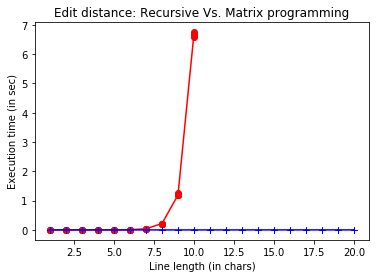

In [10]:
from matplotlib import pyplot
import numpy as np

%matplotlib inline

n = 4 # for each line compare
lineLengthsR = list(range(1,11))
lineLengthsM = list(range(1,21))
lineLengthsR = list(np.repeat(lineLengthsR, n))
lineLengthsM = list(np.repeat(lineLengthsM, n))
#print(lineLengthsR)
#print(lineLengthsM)

# EditDistanceR used
pyplot.plot(lineLengthsR, executeTimesR, color='red', marker='o', linestyle='solid') 

# EditDistanceM used
pyplot.plot(lineLengthsM, executeTimesM, color='blue', marker='+', linestyle='solid') 
pyplot.title("Edit distance: Recursive Vs. Matrix programming")

# add labels to x and y-axis
pyplot.ylabel("Execution time (in sec)")
pyplot.xlabel("Line length (in chars)")
pyplot.show()